In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

(26, 45, 20)


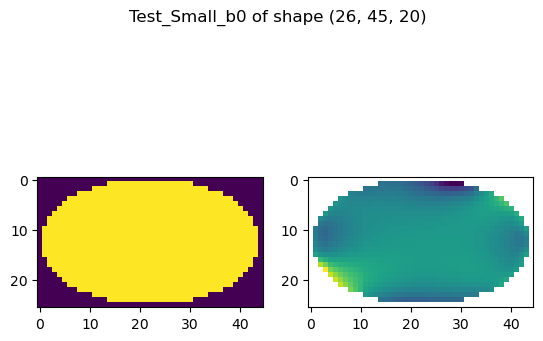

(26, 45, 20)


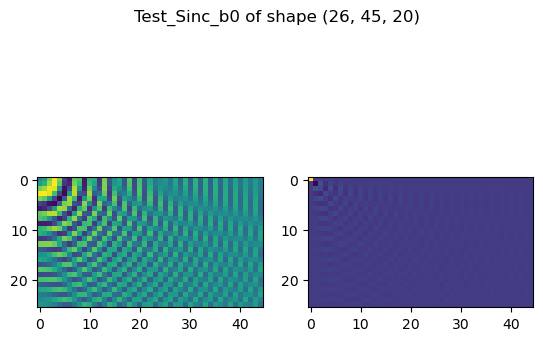

(26, 45, 20)


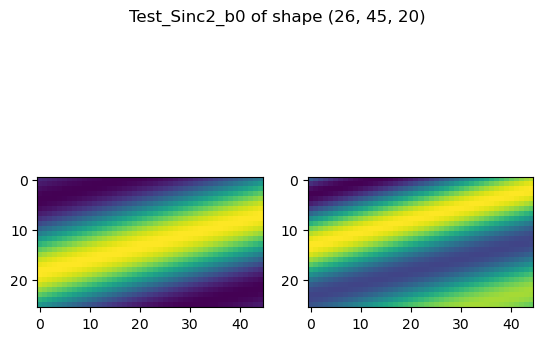

(26, 45, 20)


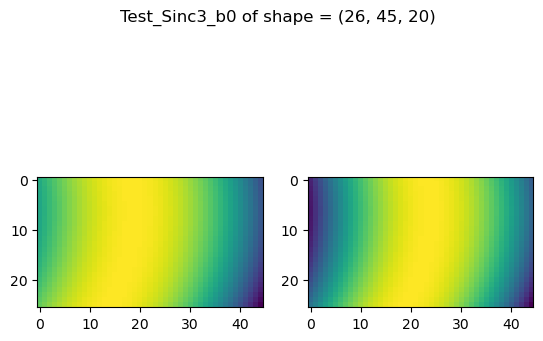

(26, 45, 20)


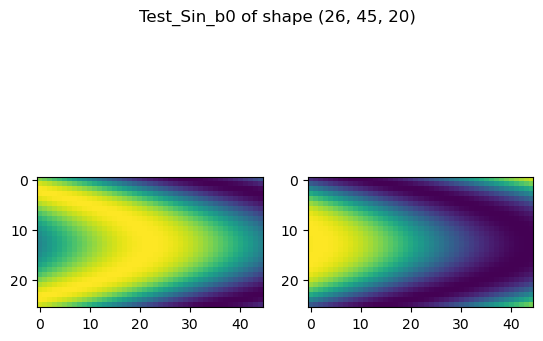

In [12]:
t = np.load('Test_Small_b0.npy')
tt = np.copy(t)
tt[tt == 0] = np.nan
s = t.shape
print(s)
plt.subplot(121)
plt.suptitle('Test_Small_b0 of shape ' + str(t.shape))
plt.imshow(t[:,:,s[2]//2])
plt.subplot(122)
plt.imshow(tt[:,:,s[2]//2])
plt.show()

t = np.load('Test_Sinc_b0.npy')
print(t.shape)
plt.subplot(121)
plt.suptitle('Test_Sinc_b0 of shape ' + str(t.shape))
plt.imshow(t[:,:,s[2]//2])
plt.subplot(122)
plt.imshow(t[:,:,0])
plt.show()

t = np.load('Test_Sinc2_b0.npy')
print(t.shape)
plt.subplot(121)
plt.imshow(t[:,:,s[2]//2])
plt.suptitle('Test_Sinc2_b0 of shape ' + str(t.shape))
plt.subplot(122)
plt.imshow(t[:,:,0])
plt.show()

t = np.load('Test_Sinc3_b0.npy')
print(t.shape)
plt.subplot(121)
plt.imshow(t[:,:,s[2]//2])
plt.suptitle('Test_Sinc3_b0 of shape = ' + str(t.shape))
plt.subplot(122)
plt.imshow(t[:,:,0])
plt.show()

t = np.load('Test_Sin_b0.npy')
print(t.shape)
plt.subplot(121)
plt.imshow(t[:,:,s[2]//2])
plt.suptitle('Test_Sin_b0 of shape ' + str(t.shape))
plt.subplot(122)
plt.imshow(t[:,:,0])
plt.show()


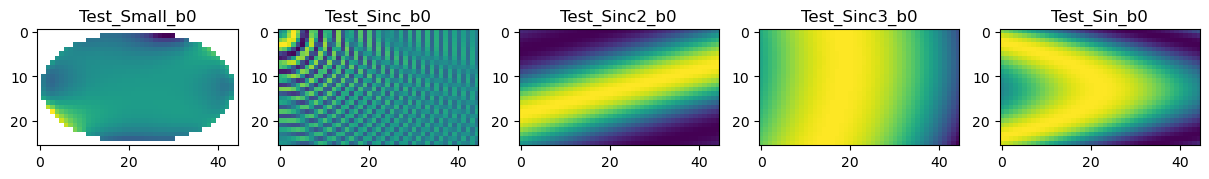

In [10]:
t = np.load('Test_Small_b0.npy')
t[t == 0] = np.nan
t2 = np.load('Test_Sinc_b0.npy')
t3 = np.load('Test_Sinc2_b0.npy')
t4 = np.load('Test_Sinc3_b0.npy')
t5 = np.load('Test_Sin_b0.npy')

fig, axs = plt.subplots(1,5,figsize=(15, 10))
axs[0].set_title('Test_Small_b0')
axs[0].imshow(t[:,:,s[2]//2])
axs[1].set_title('Test_Sinc_b0')
axs[1].imshow(t2[:,:,s[2]//2])
axs[2].set_title('Test_Sinc2_b0')
axs[2].imshow(t3[:,:,s[2]//2])
axs[3].set_title('Test_Sinc3_b0')
axs[3].imshow(t4[:,:,s[2]//2])
axs[4].set_title('Test_Sin_b0')
axs[4].imshow(t5[:,:,s[2]//2])
plt.show()


### Example of how to create a new B0 map

In [8]:
# Loading the original B0 map, shape (51, 51, 51)
B0_Tom_3D = np.load('Tom-B0.npy') 

# Creating a larger map, shape (280, 336, 311)
B0_3D = B0_Tom_3D
B0_3D= np.nan_to_num(B0_3D)
B0_3D = zoom(B0_3D, (5.5, 6.58, 6.1), order=0)
B0_3D = np.divide(B0_3D,1000)

# Creating a smaller map, shape (26, 45, 20)
B0_3D = B0_Tom_3D
B0_3D= np.nan_to_num(B0_3D)
B0_3D = zoom(B0_3D, (0.5, 0.88, 0.39), order=0)
B0_3D = np.divide(B0_3D,1000)

# Creating a smaller sinc map, shape (26, 45, 20)
t = np.zeros((B0_3D.shape))
s = t.shape

for x in range(s[0]):
    for y in range(s[1]):
        for z in range(s[2]):
            a = x - s[0]//2
            b = y - s[1]//2
            c = z - s[2]//2
            t[x,y,z] = 0.046 + 0.00001*(np.sinc((a*2 + b*0.5 + c*c)*0.05))

# Saving the data
#np.save('Test_big_b0', B0_3D)
#np.save('Test_small_b0', B0_3D)
#np.save('Test_sinc_b0', t)